In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, Dropout,MaxPooling2D,Flatten
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 7s 1us/step


(60000, 28, 28)


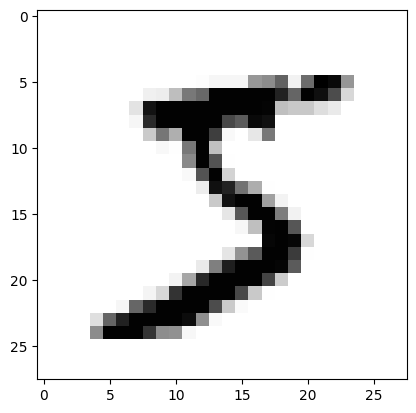

In [11]:
print(x_train.shape)

plt.imshow(x_train[0], cmap='Greys')

In [16]:
for x in x_train[0]:
    for i in x:
        print("{:3d}".format(i), end='')

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  0  0  0  0 

In [ ]:
x_train.dtype ## 데이터 타입이 int8 형태
#0 0~255 사이의 수를 0~1 사이의 수로 정규화
#1 데이터 타입을 float 형으로 변경 후 255로 나눔
x_train= x_train.astype('float64') /255
x_test= x_test.astype('float64') /255


print(np.unique(y_train))  ## 클래스가 0~9로 10개인형태  타겟이 10개

In [25]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation = 'relu'))
model.add(Conv2D(64, (3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [27]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                      

In [28]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation = 'relu'))
model.add(Conv2D(64, (3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [29]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 13, 13, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 10816)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               1384576   
                                                      

In [30]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
#모델 최적화 설정
modelpath = './data/model/mnist_cnn.hdf5'
checkpointer= ModelCheckpoint(filepath=modelpath, monitor = 'val_loss', verbose=0, save_best_only =True)

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [32]:
history  = model.fit(x_train,y_train, validation_split=0.25, epochs=100, batch_size=16, verbose=0, callbacks=[early_stopping_callback,checkpointer])


KeyboardInterrupt



In [ ]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arrange(len(y_loss))
plt.plot(x_len,y_vloss,marker= '.', c='red', label='test_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label= 'train_loss')
plt.legend()

plt.xlabel('epochs')
plt.ylabel('error')
plt.show()

In [ ]:
print(history.history['accuracy'][-1],'<-학습정확도')
print(history.history['val_accuracy'][-1],'<-검증정확도')
print(model.evaluate(x_test,y_test)[1],'<-테스트정확도')